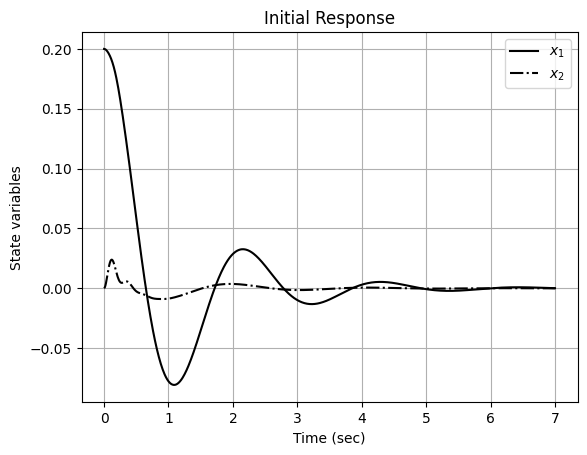

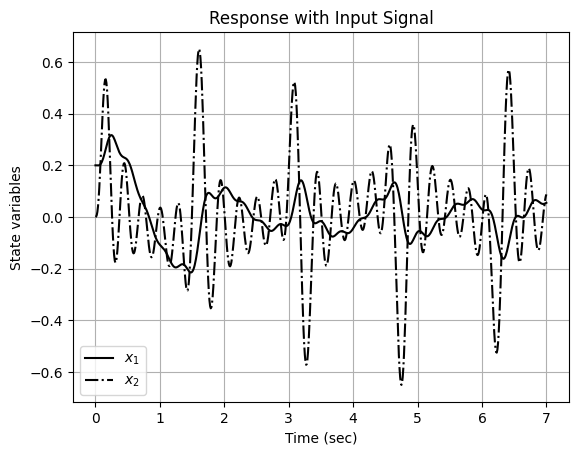

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the state-space model
A = np.array([
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [-10, 10, -2, 2],
    [60, -660, 12, -12]
])

b1 = np.array([0, 0, 0.0033, -0.02])
b2 = np.array([0, 0, 0, 600])
B = np.column_stack((b1, b2))
C = np.array([[1, 0, 0, 0]])
D = np.array([0])

# Simulation parameters
t_span = (0, 7)  # Time range for simulation
t_eval = np.linspace(0, 7, 701)  # Time points to evaluate
x0 = [0.2, 0, 0, 0]  # Initial conditions

# Define the system of ODEs for initial response
def system_ode(t, x):
    return A @ x

# Simulate initial response using solve_ivp
sol_initial = solve_ivp(system_ode, t_span, x0, t_eval=t_eval, method='RK45')
x_initial = sol_initial.y.T

# Plot initial response
plt.figure()
plt.plot(t_eval, x_initial[:, 0], 'k', label='$x_1$')
plt.plot(t_eval, x_initial[:, 1], 'k-.', label='$x_2$')
plt.grid(True)
plt.xlabel('Time (sec)')
plt.ylabel('State variables')
plt.legend()
plt.title('Initial Response')
plt.show()

# Define input signal function
def input_signal(t):
    return 0.1 * (np.sin(5 * t) + np.sin(9 * t) + np.sin(13 * t) + np.sin(17 * t) + np.sin(21 * t))

# Define the system of ODEs with input
def system_ode_with_input(t, x):
    u = input_signal(t)
    return A @ x + b2 * u

# Simulate response with input using solve_ivp
sol_forced = solve_ivp(system_ode_with_input, t_span, x0, t_eval=t_eval, method='RK45')
x_forced = sol_forced.y.T

# Plot response with input signal
plt.figure()
plt.plot(t_eval, x_forced[:, 0], 'k', label='$x_1$')
plt.plot(t_eval, x_forced[:, 1], 'k-.', label='$x_2$')
plt.grid(True)
plt.xlabel('Time (sec)')
plt.ylabel('State variables')
plt.legend()
plt.title('Response with Input Signal')
plt.show()
